Imports

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy.optimize import least_squares
from scipy.interpolate import interp1d
import numpy as np
%matplotlib widget


Plot Raw Data

In [136]:

def plot(csv_files):

    # Find all CSV files that start with "TEK"
    # csv_files = glob.glob("TEK*.csv")

    plt.figure(figsize=(10, 6))

    # Loop through each CSV file and plot its data
    for file in csv_files:
        # Read CSV file, skipping the first 16 rows
        data = pd.read_csv(file, skiprows=16)
        
        # Assuming the first column is x and the second is y
        x = data.iloc[:, 0]
        y = data.iloc[:, 1]
        
        # Plot the data
        plt.plot(x, y, label=file)

    # Configure the plot
    plt.xlabel("Time (s)")
    plt.ylabel("Signal (V)")
    plt.title("Plot of " + str(csv_files))
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()


Data Analysis

In [137]:

def plot_and_fit(file1,file2):

    # Find all CSV files that start with "TEK"
    # csv_files = glob.glob("TEK*.csv")

    plt.figure(figsize=(10, 6))


    data1 = pd.read_csv(file1, skiprows=16)
    
    # Assuming the first column is x and the second is y
    x1 = data1.iloc[:, 0]
    y1 = data1.iloc[:, 1]
    
    data2 = pd.read_csv(file2, skiprows=16)
    
    # Assuming the first column is x and the second is y
    x2 = data2.iloc[:, 0]
    y2 = data2.iloc[:, 1]


    #Make cuts to data around signal region
    d1 = np.array([x1, y1]).transpose()
    d2 = np.array([x2, y2]).transpose()
    
    d1 = np.array([d for d in d1 if d[0] < 0 and d[0] > -0.9e-5]).transpose()
    d2 = np.array([d for d in d2 if d[0] < 0 and d[0] > -0.9e-5]).transpose()
    





    x1_func = interp1d(x1, y1, fill_value=np.nan, kind="linear")
    cut_x1_func = interp1d(d1[0], d1[1], fill_value=np.nan, kind="linear")

    x2_func = interp1d(x2, y2, fill_value=np.nan, kind="linear")
    cut_x2_func = interp1d(d2[0], d2[1], fill_value=np.nan, kind="linear")

    # Define residuals function fitting x2 to x1
    def residuals(p):
        # params p: a, b, t
        #print("Guesses " + str(p))
        return [x1_func(d2[0,i]-p[2]) - (cut_x2_func(d2[0,i])*p[0] + p[1]) for i in range(len(d2[0]))]
    

  
    # Use curve_fit to determine best a, b, and c
    result = least_squares(residuals, x0=[0.5, 0, 3e-7], bounds=([0,-0.6,0],[np.inf,0.6,1e-6]))  # Initial guess: a=1, b=0, c=0
    a,b,t = result.x

    print(result.x)
  

    #Plot Normalization to Short Path
    miny1 = min(y1)
    maxy1=max(y1) - miny1

    miny2 = min(y2)
    maxy2=max(y2)-miny2

    plt.plot(x1, (y1-miny1)/maxy1, label="Short", color='blue')
    plt.plot(d2[0], (d2[1]-miny2)/maxy2, label="Long",  color='orange')

    # Apply transformation using best-fit parameters
    x3 = d2[0]-t
    y3 = d2[1]*a + b
    miny3 = min(y3)
    maxy3=max(y3)-miny3

    plt.plot(x3, (y3-miny3)/maxy3, label="Fit: $\Delta$t = " + str(-round(t*(10**9),2)) + "ns", ls='-', color='red', lw=1)
        

    # Configure the plot
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized Signal")
    plt.title("Short and Long Path Laser Pulse Signals")
    plt.legend()
    plt.grid()

    # Show the plot
    plt.xlim(-1e-5,0.2e-5)
    plt.show()

    c= 102.572/t
    print("c = " + str(c))
    print("u_c = ")


[ 4.87295251e+00 -3.93351290e-02  3.38128657e-07]


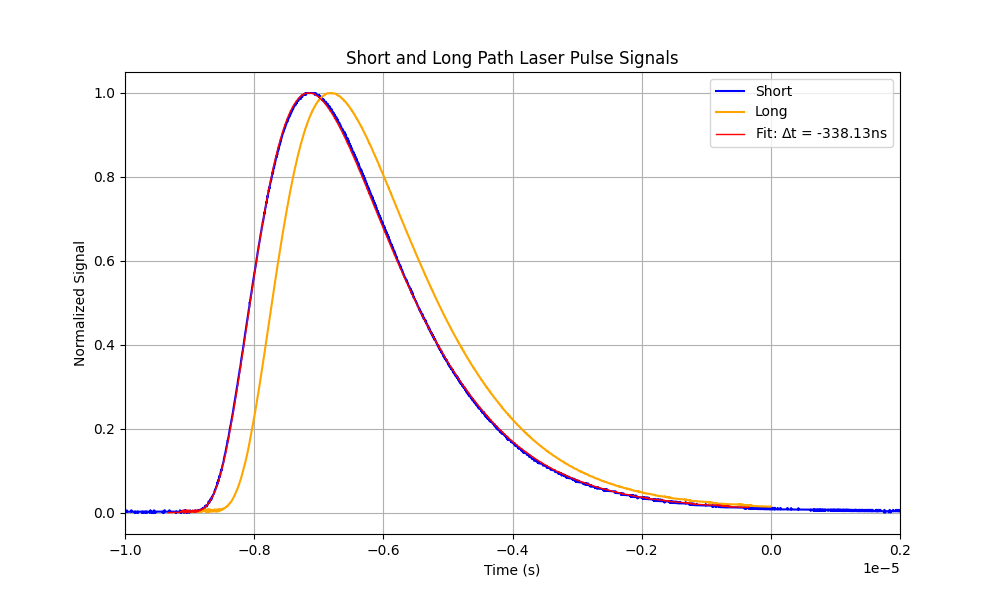

c = 303351986.7674732
u_c = 


In [138]:
plot_and_fit("short.CSV", "long.CSV")

[4.89886639e+00 1.19300112e-01 3.43099904e-07]


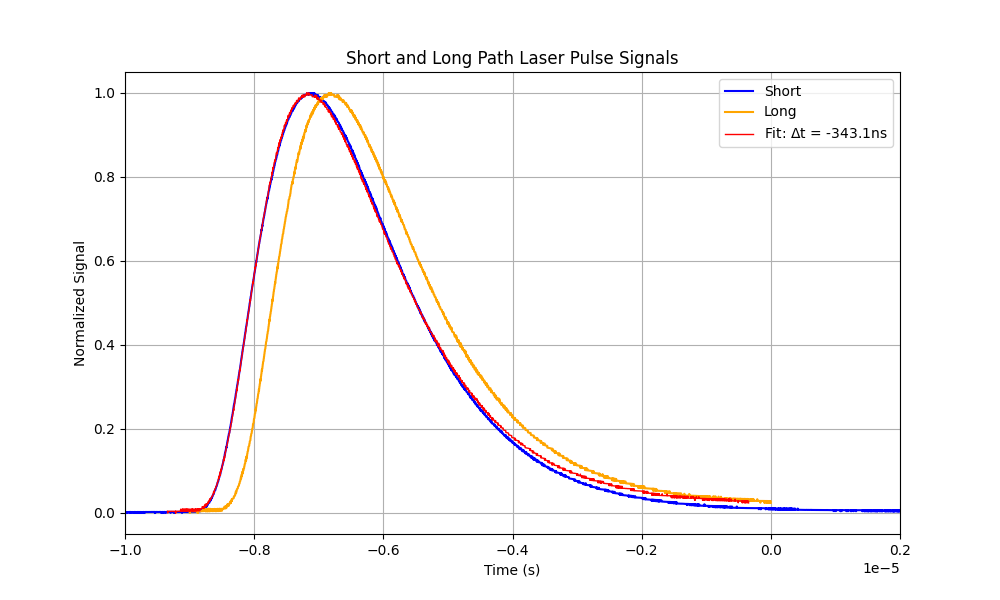

c = 298956656.1531648
u_c = 


In [139]:

plot_and_fit("short_zoom.CSV", "long_zoom.CSV")

In [ ]:

def plot_residuals(file1,file2):

    # Find all CSV files that start with "TEK"
    # csv_files = glob.glob("TEK*.csv")

    plt.figure(figsize=(10, 6))


    data1 = pd.read_csv(file1, skiprows=16)
    
    # Assuming the first column is x and the second is y
    x1 = data1.iloc[:, 0]
    y1 = data1.iloc[:, 1]
    
    data2 = pd.read_csv(file2, skiprows=16)
    
    # Assuming the first column is x and the second is y
    x2 = data2.iloc[:, 0]
    y2 = data2.iloc[:, 1]


    #Make cuts to data around signal region
    d1 = np.array([x1, y1]).transpose()
    d2 = np.array([x2, y2]).transpose()
    
    d1 = np.array([d for d in d1 if d[0] < 0 and d[0] > -0.9e-5]).transpose()
    d2 = np.array([d for d in d2 if d[0] < 0 and d[0] > -0.9e-5]).transpose()


    x1_func = interp1d(x1, y1, fill_value=np.nan, kind="linear")
    cut_x1_func = interp1d(d1[0], d1[1], fill_value=np.nan, kind="linear")

    x2_func = interp1d(x2, y2, fill_value=np.nan, kind="linear")
    cut_x2_func = interp1d(d2[0], d2[1], fill_value=np.nan, kind="linear")

    # Define residuals function fitting x2 to x1
    def residuals(p):
        # params p: a, b, t
        #print("Guesses " + str(p))
        return [x1_func(d2[0,i]-p[2]) - (cut_x2_func(d2[0,i])*p[0] + p[1]) for i in range(len(d2[0]))]
  
    # Use curve_fit to determine best a, b, and c
    result = least_squares(residuals, x0=[0.5, 0, 3e-7], bounds=([0,-0.6,0],[np.inf,0.6,1e-6]))  # Initial guess: a=1, b=0, c=0
    a,b,t = result.x

    print(result.x)
  

    #Plot Normalization to Short Path
    miny1 = min(y1)
    maxy1=max(y1) - miny1

    miny2 = min(y2)
    maxy2=max(y2)-miny2

    # Apply transformation using best-fit parameters
    x3 = d2[0]-t
    y3 = d2[1]*a + b
    miny3 = min(y3)
    maxy3=max(y3)-miny3

    plt.plot(x3)

    plt.scatter(d2[0], residuals(result.x),s=0.1)


    # Configure the plot
    plt.xlabel("Time (s)")
    plt.ylabel("Residual (V)")
    plt.title("Residual Plot")
    plt.legend()
    plt.grid()

    # Show the plot
    plt.xlim(-1e-5,0.2e-5)
    plt.show()

    c= 102.572/t
    print("c = " + str(c))
    print("u_c = ")


[ 4.87295251e+00 -3.93351290e-02  3.38128657e-07]


C:\Users\deans\AppData\Local\Temp\ipykernel_47556\2747923912.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


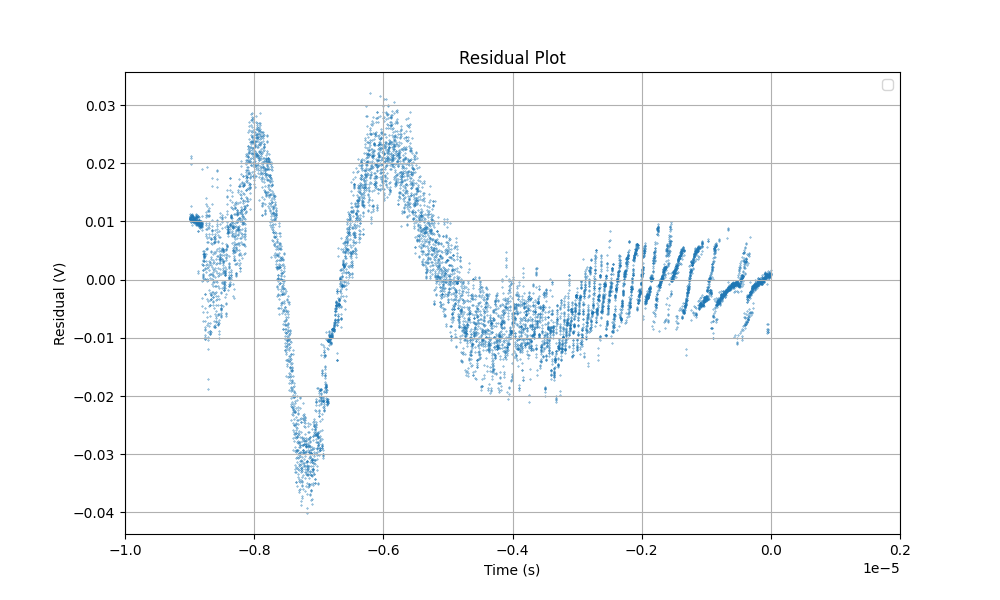

c = 303351986.7674732
u_c = 


In [143]:
plot_residuals("short.CSV", "long.CSV")

[4.89886639e+00 1.19300112e-01 3.43099904e-07]


C:\Users\deans\AppData\Local\Temp\ipykernel_47556\2747923912.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


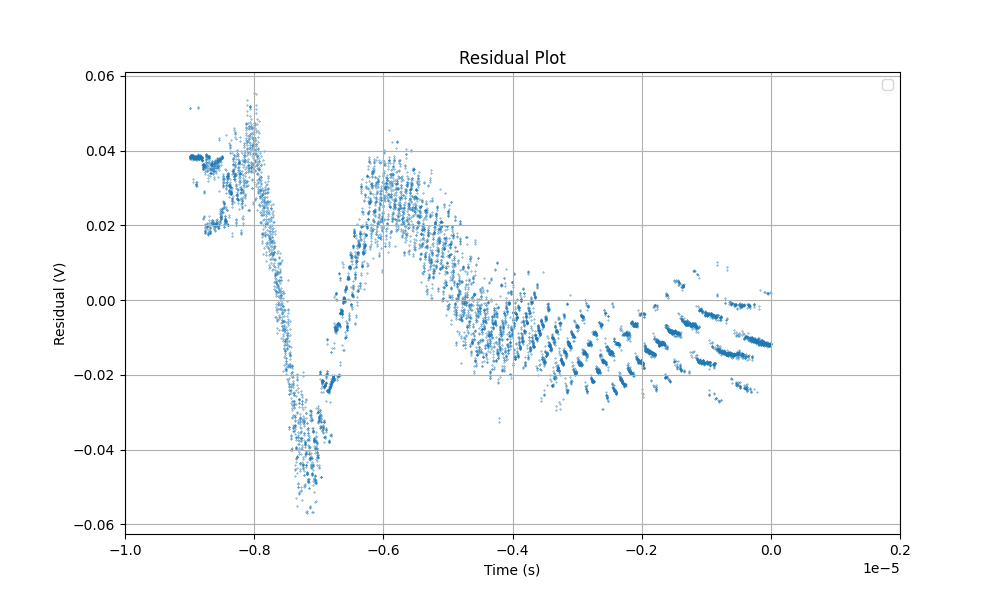

c = 298956656.1531648
u_c = 


In [144]:

plot_residuals("short_zoom.CSV", "long_zoom.CSV")